In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from scipy import stats

from matplotlib import pyplot as plt

In [2]:
file_path = 'C:\PasswordData/paper/updateValidationResult.csv'
validation = pd.read_csv(file_path, engine='python')

In [3]:
file_path = 'C:\PasswordData/paper/updatePredictResult.csv'
predict = pd.read_csv(file_path, engine='python')

In [4]:
file_path = 'C:\PasswordData/paper/randomUpdatePasswordResult.csv'
randomUpdate = pd.read_csv(file_path, engine='python')

In [5]:
file_path = 'C:\PasswordData/paper/feedbackUpdatePasswordResult.csv'
feedbackUpdate = pd.read_csv(file_path, engine='python')

In [6]:
predict.head()

,password,result,predict,leak
0,gafit,0,0.041182,1
1,#DRAG,1,0.147149,0
2,ksal,0,0.039001,24
3,48002542HOT,1,0.999971,0
4,576290,0,0.009842,103


In [7]:
bins = [-1, 0.5, 1.1]

predict_group = pd.cut(predict['predict'], bins, labels=[0, 1])
predict['predictResult'] = predict_group

In [8]:
for i, row in predict.iterrows():
    if (predict.at[i,'result'] == 0 and predict.at[i,'predictResult'] == 0):
        predict.at[i, 'group'] = '0'
    elif (predict.at[i,'result'] == 1 and predict.at[i,'predictResult'] == 1):
        predict.at[i, 'group'] = '1'
    elif (predict.at[i,'result'] == 0 and predict.at[i,'predictResult'] == 1):
        predict.at[i, 'group'] = '2'
    elif (predict.at[i,'result'] == 1 and predict.at[i,'predictResult'] == 0):
        predict.at[i, 'group'] = '3'
    
    

predict.head()

,password,result,predict,leak,predictResult,group
0,gafit,0,0.041182,1,0,0
1,#DRAG,1,0.147149,0,0,3
2,ksal,0,0.039001,24,0,0
3,48002542HOT,1,0.999971,0,1,1
4,576290,0,0.009842,103,0,0


In [9]:
predict.groupby('group').count()

,password,result,predict,leak,predictResult
group,,,,,
0,4849,4849,4849,4849,4849
1,4703,4703,4703,4703,4703
2,151,151,151,151,151
3,297,297,297,297,297


In [10]:
print(predict[(predict['group'] == '0')].count()['password'])# 유출된 비밀번호 유출로 판단
print(predict[(predict['group'] == '1')].count()['password'])# 유출되지 않은 비밀번호 유출되지 않았다고 판단
print(predict[(predict['group'] == '2')].count()['password'])# 유출된 비밀번호를 유출되지 않았다고 판단
print(predict[(predict['group'] == '3')].count()['password'])# 유출되지 않은 비밀번호를 유출되었다고 판단

4849
4703
151
297


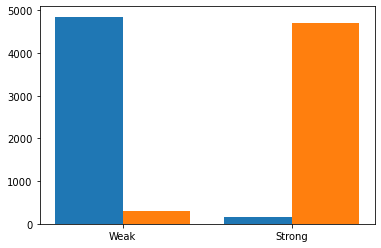

In [11]:
topics = ['Weak', 'Strong']

# value_a : 유출된 비밀번호
# value_b : 유출되지 않은 비밀번호
value_a = [predict[(predict['group'] == '0')].count()['password'], predict[(predict['group'] == '2')].count()['password']]
value_b = [predict[(predict['group'] == '3')].count()['password'], predict[(predict['group'] == '1')].count()['password']]

def create_x(t, w, n, d):
    return [t*x + w*n for x in range(d)]

value_a_x = create_x(2, 0.8, 1, 2)
value_b_x = create_x(2, 0.8, 2, 2)

ax = plt.subplot()

ax.bar(value_a_x, value_a)
ax.bar(value_b_x, value_b)

middle_x = [(a+b)/2 for (a,b) in zip(value_a_x, value_b_x)]

ax.set_xticks(middle_x)
ax.set_xticklabels(topics)

# ax.set_xlabel()
# ax.set_ylabel('Leak Count')

plt.show()

In [12]:
validation.head()

,password,zxcvbn,luds,levenshtein,leak
0,gafit,3,7,2,1
1,#DRAG,3,22,4,0
2,ksal,3,6,1,24
3,48002542HOT,7,87,11,0
4,576290,2,16,6,103


In [13]:
bins = [-1, 1, 3, 5, 7, 9]

validation_group = pd.cut(validation['zxcvbn'], bins, labels=[0, 1, 2, 3, 4])
validation['zxcvbnResult'] = validation_group

In [14]:
bins = [-1, 20, 40, 60, 80, 999]

validation_group = pd.cut(validation['luds'], bins, labels=[0, 1, 2, 3, 4])
validation['ludsResult'] = validation_group

In [15]:
bins = [-1, 2, 999]

validation_group = pd.cut(validation['levenshtein'], bins, labels=[0, 1])
validation['levenshteinResult'] = validation_group

In [16]:
for i, row in validation.iterrows():
    if (validation.at[i,'zxcvbnResult'] == 0 and validation.at[i,'leak'] == 0):
        validation.at[i, 'zxcvbnGroup'] = '0'# Very Weak, 유출되지 않음
    elif (validation.at[i,'zxcvbnResult'] == 1 and validation.at[i,'leak'] == 0):
        validation.at[i, 'zxcvbnGroup'] = '1'# Weak, 유출되지 않음
    elif (validation.at[i,'zxcvbnResult'] == 2 and validation.at[i,'leak'] == 0):
        validation.at[i, 'zxcvbnGroup'] = '2'# Average, 유출되지 않음
    elif (validation.at[i,'zxcvbnResult'] == 3 and validation.at[i,'leak'] == 0):
        validation.at[i, 'zxcvbnGroup'] = '3'# Strong, 유출되지 않음
    elif (validation.at[i,'zxcvbnResult'] == 4 and validation.at[i,'leak'] == 0):
        validation.at[i, 'zxcvbnGroup'] = '4'# Very Strong, 유출되지 않음
    elif (validation.at[i,'zxcvbnResult'] == 0 and validation.at[i,'leak'] > 0):
        validation.at[i, 'zxcvbnGroup'] = '5'# Very Weak, 유출됨
    elif (validation.at[i,'zxcvbnResult'] == 1 and validation.at[i,'leak'] > 0):
        validation.at[i, 'zxcvbnGroup'] = '6'# Weak, 유출됨
    elif (validation.at[i,'zxcvbnResult'] == 2 and validation.at[i,'leak'] > 0):
        validation.at[i, 'zxcvbnGroup'] = '7'# Average, 유출됨
    elif (validation.at[i,'zxcvbnResult'] == 3 and validation.at[i,'leak'] > 0):
        validation.at[i, 'zxcvbnGroup'] = '8'# Strong, 유출됨
    elif (validation.at[i,'zxcvbnResult'] == 4 and validation.at[i,'leak'] > 0):
        validation.at[i, 'zxcvbnGroup'] = '9'# Very Strong, 유출됨

In [17]:
for i, row in validation.iterrows():
    if (validation.at[i,'ludsResult'] == 0 and validation.at[i,'leak'] == 0):
        validation.at[i, 'ludsGroup'] = '0'# Very Weak, 유출되지 않음
    elif (validation.at[i,'ludsResult'] == 1 and validation.at[i,'leak'] == 0):
        validation.at[i, 'ludsGroup'] = '1'# Weak,유출되지 않음
    elif (validation.at[i,'ludsResult'] == 2 and validation.at[i,'leak'] == 0):
        validation.at[i, 'ludsGroup'] = '2'# Average, 유출되지 않음
    elif (validation.at[i,'ludsResult'] == 3 and validation.at[i,'leak'] == 0):
        validation.at[i, 'ludsGroup'] = '3'# Strong, 유출되지 않음
    elif (validation.at[i,'ludsResult'] == 4 and validation.at[i,'leak'] == 0):
        validation.at[i, 'ludsGroup'] = '4'# Very Strong, 유출되지 않음
    elif (validation.at[i,'ludsResult'] == 0 and validation.at[i,'leak'] > 0):
        validation.at[i, 'ludsGroup'] = '5'# Very Weak, 유출됨
    elif (validation.at[i,'ludsResult'] == 1 and validation.at[i,'leak'] > 0):
        validation.at[i, 'ludsGroup'] = '6'# Weak, 유출됨
    elif (validation.at[i,'ludsResult'] == 2 and validation.at[i,'leak'] > 0):
        validation.at[i, 'ludsGroup'] = '7'# Average, 유출됨
    elif (validation.at[i,'ludsResult'] == 3 and validation.at[i,'leak'] > 0):
        validation.at[i, 'ludsGroup'] = '8'# Strong, 유출됨
    elif (validation.at[i,'ludsResult'] == 4 and validation.at[i,'leak'] > 0):
        validation.at[i, 'ludsGroup'] = '9'# Very Strong, 유출됨

In [18]:
for i, row in validation.iterrows():
    if (validation.at[i,'levenshteinResult'] == 0 and validation.at[i,'leak'] == 0):
        validation.at[i, 'levenshteinGroup'] = '0'# Weak, 유출되지 않음
    elif (validation.at[i,'levenshteinResult'] == 1 and validation.at[i,'leak'] == 0):
        validation.at[i, 'levenshteinGroup'] = '1'# Strong, 유출되지 않음
    elif (validation.at[i,'levenshteinResult'] == 0 and validation.at[i,'leak'] > 0):
        validation.at[i, 'levenshteinGroup'] = '2'# Weak, 유출됨
    elif (validation.at[i,'levenshteinResult'] == 1 and validation.at[i,'leak'] > 0):
        validation.at[i, 'levenshteinGroup'] = '3'# Strong, 유출됨

In [19]:
print(validation[(validation['zxcvbnGroup'] == '0')].count()['password'])
print(validation[(validation['zxcvbnGroup'] == '1')].count()['password'])
print(validation[(validation['zxcvbnGroup'] == '2')].count()['password'])
print(validation[(validation['zxcvbnGroup'] == '3')].count()['password'])
print(validation[(validation['zxcvbnGroup'] == '4')].count()['password'])
print(validation[(validation['zxcvbnGroup'] == '5')].count()['password'])
print(validation[(validation['zxcvbnGroup'] == '6')].count()['password'])
print(validation[(validation['zxcvbnGroup'] == '7')].count()['password'])
print(validation[(validation['zxcvbnGroup'] == '8')].count()['password'])
print(validation[(validation['zxcvbnGroup'] == '9')].count()['password'])

1
712
748
791
2748
314
4446
239
1
0


In [20]:
print('zxcvbn Weak Weak : ', validation[(validation['zxcvbnGroup'] == '5')].count()['password'] + validation[(validation['zxcvbnGroup'] == '6')].count()['password'])
print('zxcvbn Weak Strong : ', validation[(validation['zxcvbnGroup'] == '7')].count()['password'] + validation[(validation['zxcvbnGroup'] == '8')].count()['password'] + validation[(validation['zxcvbnGroup'] == '9')].count()['password'])
print('zxcvbn Strong Strong : ', validation[(validation['zxcvbnGroup'] == '2')].count()['password'] + validation[(validation['zxcvbnGroup'] == '3')].count()['password'] + validation[(validation['zxcvbnGroup'] == '4')].count()['password'])
print('zxcvbn Strong Weak : ', validation[(validation['zxcvbnGroup'] == '0')].count()['password'] + validation[(validation['zxcvbnGroup'] == '1')].count()['password'])

zxcvbn Weak Weak :  4760
zxcvbn Weak Strong :  240
zxcvbn Strong Strong :  4287
zxcvbn Strong Weak :  713


In [21]:
print(validation[(validation['ludsGroup'] == '0')].count()['password'])
print(validation[(validation['ludsGroup'] == '1')].count()['password'])
print(validation[(validation['ludsGroup'] == '2')].count()['password'])
print(validation[(validation['ludsGroup'] == '3')].count()['password'])
print(validation[(validation['ludsGroup'] == '4')].count()['password'])
print(validation[(validation['ludsGroup'] == '5')].count()['password'])
print(validation[(validation['ludsGroup'] == '6')].count()['password'])
print(validation[(validation['ludsGroup'] == '7')].count()['password'])
print(validation[(validation['ludsGroup'] == '8')].count()['password'])
print(validation[(validation['ludsGroup'] == '9')].count()['password'])

577
548
784
641
2450
4575
348
63
10
4


In [22]:
print('LUDS Weak Weak : ', validation[(validation['ludsGroup'] == '5')].count()['password'] + validation[(validation['ludsGroup'] == '6')].count()['password'])
print('LUDS Weak Strong : ', validation[(validation['ludsGroup'] == '7')].count()['password'] + validation[(validation['ludsGroup'] == '8')].count()['password'] + validation[(validation['ludsGroup'] == '9')].count()['password'])
print('LUDS Strong Strong : ', validation[(validation['ludsGroup'] == '2')].count()['password'] + validation[(validation['ludsGroup'] == '3')].count()['password'] + validation[(validation['ludsGroup'] == '4')].count()['password'])
print('LUDS Strong Weak : ', validation[(validation['ludsGroup'] == '0')].count()['password'] + validation[(validation['ludsGroup'] == '1')].count()['password'])

LUDS Weak Weak :  4923
LUDS Weak Strong :  77
LUDS Strong Strong :  3875
LUDS Strong Weak :  1125


In [23]:
print(validation[(validation['levenshteinGroup'] == '0')].count()['password'])
print(validation[(validation['levenshteinGroup'] == '1')].count()['password'])
print(validation[(validation['levenshteinGroup'] == '2')].count()['password'])
print(validation[(validation['levenshteinGroup'] == '3')].count()['password'])

48
4952
896
4104


In [24]:
print('Levenshtein Weak Weak : ', validation[(validation['levenshteinGroup'] == '2')].count()['password'])
print('Levenshtein Weak Strong : ', validation[(validation['levenshteinGroup'] == '3')].count()['password'])
print('Levenshtein Strong Strong : ', validation[(validation['levenshteinGroup'] == '1')].count()['password'])
print('Levenshtein Strong Weak : ', validation[(validation['levenshteinGroup'] == '0')].count()['password'])

Levenshtein Weak Weak :  896
Levenshtein Weak Strong :  4104
Levenshtein Strong Strong :  4952
Levenshtein Strong Weak :  48


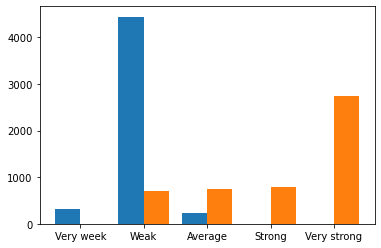

In [25]:
topics = ['Very week', 'Weak', 'Average', 'Strong', 'Very strong']

# value_a : 유출된 비밀번호
# value_b : 유출되지 않은 비밀번호
value_a = [validation[(validation['zxcvbnGroup'] == '5')].count()['password'], validation[(validation['zxcvbnGroup'] == '6')].count()['password'], validation[(validation['zxcvbnGroup'] == '7')].count()['password'], validation[(validation['zxcvbnGroup'] == '8')].count()['password'], validation[(validation['zxcvbnGroup'] == '9')].count()['password']]
value_b = [validation[(validation['zxcvbnGroup'] == '0')].count()['password'], validation[(validation['zxcvbnGroup'] == '1')].count()['password'], validation[(validation['zxcvbnGroup'] == '2')].count()['password'], validation[(validation['zxcvbnGroup'] == '3')].count()['password'], validation[(validation['zxcvbnGroup'] == '4')].count()['password']]

def create_x(t, w, n, d):
    return [t*x + w*n for x in range(d)]

value_a_x = create_x(2, 0.8, 1, 5)
value_b_x = create_x(2, 0.8, 2, 5)

ax = plt.subplot()

ax.bar(value_a_x, value_a)
ax.bar(value_b_x, value_b)

middle_x = [(a+b)/2 for (a,b) in zip(value_a_x, value_b_x)]

ax.set_xticks(middle_x)
ax.set_xticklabels(topics)

plt.show()

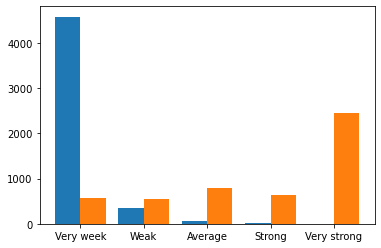

In [26]:
topics = ['Very week', 'Weak', 'Average', 'Strong', 'Very strong']

# value_a : 유출된 비밀번호
# value_b : 유출되지 않은 비밀번호
value_a = [validation[(validation['ludsGroup'] == '5')].count()['password'], validation[(validation['ludsGroup'] == '6')].count()['password'], validation[(validation['ludsGroup'] == '7')].count()['password'], validation[(validation['ludsGroup'] == '8')].count()['password'], validation[(validation['ludsGroup'] == '9')].count()['password']]
value_b = [validation[(validation['ludsGroup'] == '0')].count()['password'], validation[(validation['ludsGroup'] == '1')].count()['password'], validation[(validation['ludsGroup'] == '2')].count()['password'], validation[(validation['ludsGroup'] == '3')].count()['password'], validation[(validation['ludsGroup'] == '4')].count()['password']]

def create_x(t, w, n, d):
    return [t*x + w*n for x in range(d)]

value_a_x = create_x(2, 0.8, 1, 5)
value_b_x = create_x(2, 0.8, 2, 5)

ax = plt.subplot()

ax.bar(value_a_x, value_a)
ax.bar(value_b_x, value_b)

middle_x = [(a+b)/2 for (a,b) in zip(value_a_x, value_b_x)]

ax.set_xticks(middle_x)
ax.set_xticklabels(topics)

plt.show()

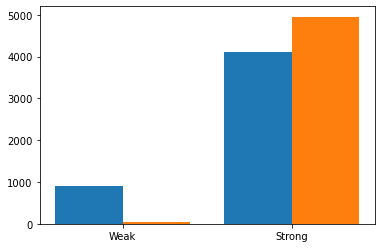

In [27]:
topics = ['Weak', 'Strong']

# value_a : 유출된 비밀번호
# value_b : 유출되지 않은 비밀번호
value_a = [validation[(validation['levenshteinGroup'] == '2')].count()['password'], validation[(validation['levenshteinGroup'] == '3')].count()['password']]
value_b = [validation[(validation['levenshteinGroup'] == '0')].count()['password'], validation[(validation['levenshteinGroup'] == '1')].count()['password']]

def create_x(t, w, n, d):
    return [t*x + w*n for x in range(d)]

value_a_x = create_x(2, 0.8, 1, 2)
value_b_x = create_x(2, 0.8, 2, 2)

ax = plt.subplot()

ax.bar(value_a_x, value_a)
ax.bar(value_b_x, value_b)

middle_x = [(a+b)/2 for (a,b) in zip(value_a_x, value_b_x)]

ax.set_xticks(middle_x)
ax.set_xticklabels(topics)

plt.show()

In [28]:
randomUpdate.head()

,password,leakCount
0,gafiqt,0
1,gafit),0
2,gamfit,0
3,g7afit,0
4,ga@fit,0


In [29]:
for i, row in randomUpdate.iterrows():
    if (randomUpdate.at[i,'leakCount'] == 0):
        randomUpdate.at[i, 'group'] = '0'# 랜덤적으로 비밀번호 보완 후 유출되지 않은 비밀번호
    elif (randomUpdate.at[i,'leakCount'] > 0):
        randomUpdate.at[i, 'group'] = '1'# 랜덤적으로 비밀번호 보완 후 유출된 비밀번호

randomUpdate.head()

,password,leakCount,group
0,gafiqt,0,0
1,gafit),0,0
2,gamfit,0,0
3,g7afit,0,0
4,ga@fit,0,0


In [30]:
print('Random Update Not Leak Password : ', randomUpdate[(randomUpdate['group'] == '0')].count()['password'])
print('Random Update Leak Password : ', randomUpdate[(randomUpdate['group'] == '1')].count()['password'])

Random Update Not Leak Password :  43503
Random Update Leak Password :  7957


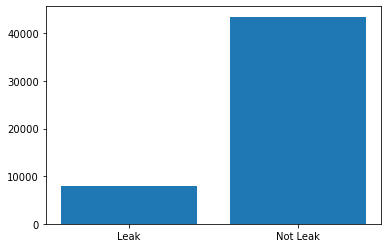

In [31]:
x = np.arange(2)
years = ['Leak', 'Not Leak']
values = [randomUpdate[(randomUpdate['group'] == '1')].count()['password'], randomUpdate[(randomUpdate['group'] == '0')].count()['password']]

plt.bar(x, values)
plt.xticks(x, years)
plt.show()

In [32]:
feedbackUpdate.head()

,password,leakCount
0,gaf&it,0
1,gaf4it,0
2,gafit5,2
3,g9afit,0
4,ga3fit,0


In [33]:
for i, row in feedbackUpdate.iterrows():
    if (feedbackUpdate.at[i,'leakCount'] == 0):
        feedbackUpdate.at[i, 'group'] = '0'# 피드백대로 비밀번호 보완 후 유출되지 않은 비밀번호
    elif (feedbackUpdate.at[i,'leakCount'] > 0):
        feedbackUpdate.at[i, 'group'] = '1'# 피드백대로 비밀번호 보완 후 유출된 비밀번호

feedbackUpdate.head()

,password,leakCount,group
0,gaf&it,0,0
1,gaf4it,0,0
2,gafit5,2,1
3,g9afit,0,0
4,ga3fit,0,0


In [34]:
print('Feedback Update Not Leak Password : ', feedbackUpdate[(feedbackUpdate['group'] == '0')].count()['password'])
print('Feedback Update Not Leak Password : ', feedbackUpdate[(feedbackUpdate['group'] == '1')].count()['password'])

Feedback Update Not Leak Password :  48815
Feedback Update Not Leak Password :  2645


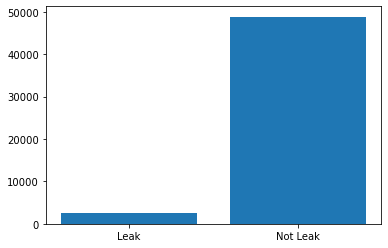

In [35]:
x = np.arange(2)
years = ['Leak', 'Not Leak']
values = [feedbackUpdate[(feedbackUpdate['group'] == '1')].count()['password'], feedbackUpdate[(feedbackUpdate['group'] == '0')].count()['password']]

plt.bar(x, values)
plt.xticks(x, years)
plt.show()

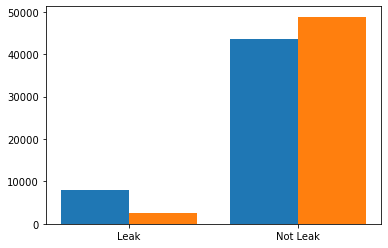

In [36]:
topics = ['Leak', 'Not Leak']

# value_a : 랜덤적으로 업데이트한 비밀번호
# value_b : 피드백대로 업데이트한 비밀번호
value_a = [randomUpdate[(randomUpdate['group'] == '1')].count()['password'], randomUpdate[(randomUpdate['group'] == '0')].count()['password']]
value_b = [feedbackUpdate[(feedbackUpdate['group'] == '1')].count()['password'], feedbackUpdate[(feedbackUpdate['group'] == '0')].count()['password']]

def create_x(t, w, n, d):
    return [t*x + w*n for x in range(d)]

value_a_x = create_x(2, 0.8, 1, 2)
value_b_x = create_x(2, 0.8, 2, 2)

ax = plt.subplot()

ax.bar(value_a_x, value_a)
ax.bar(value_b_x, value_b)

middle_x = [(a+b)/2 for (a,b) in zip(value_a_x, value_b_x)]

ax.set_xticks(middle_x)
ax.set_xticklabels(topics)

plt.show()